## Семинар 2 "Распознавание рукописных цифр"

ФИО: Салихова Кария Илшатовна

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline

In [2]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [3]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    print(X, y)
    y = y.numpy()
    break
    #в конце классы картинок

[[-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 ...
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]] tensor([2, 0, 9, 1, 8, 1, 2, 6, 8, 1, 5, 7, 5, 1, 5, 4, 8, 2, 7, 8, 6, 7, 8, 0,
        0, 6, 1, 4, 5, 5, 5, 9])


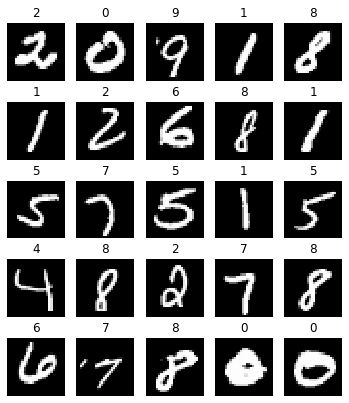

In [4]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [6]:
layers = [Linear(784, 100), Sigmoid(),
         Linear(100, 100), Sigmoid(), Linear(100, 10)]
nn = NeuralNetwork(layers)

criterion = NLLLoss()
all_losses_sigmoid =[]
accuracies = []
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    all_losses_sigmoid.append(loss)
    nn.backward(dLdy)
    nn.step(0.1)

Text(0.5, 1.0, 'Sigmoid - Train loss')

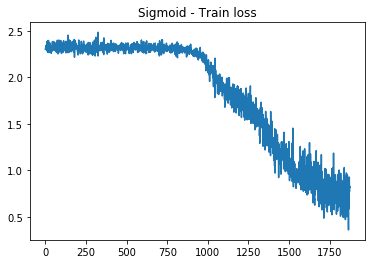

In [7]:
plt.plot(np.array(all_losses_sigmoid))
plt.title('Sigmoid - Train loss')

In [8]:
all_losses_sigmoid_test =[]
accuracies = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    all_losses_sigmoid_test.append(loss)
    accuracies.append((np.argmax(output, 1)==y).mean())
test_accuracy_sigmoid = np.mean(accuracies)

Sigmoid accuracy: 0.8064097444089456
Sigmoid mean loss: 0.6703517355130175


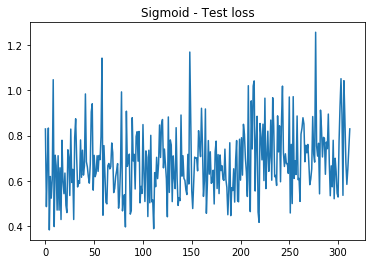

In [9]:
plt.plot(np.array(all_losses_sigmoid_test))
plt.title('Sigmoid - Test loss')
print('Sigmoid accuracy:', test_accuracy_sigmoid)
print('Sigmoid mean loss:', np.median(all_losses_sigmoid_test))

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [10]:
class ReLu:
    def __init__(self):
        pass
    
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
    
    def backward(self, dLdy):
        return dLdy * (self.x > 0)
    
    def step(self, learning_rate):
        pass

In [11]:
layers = [Linear(784, 100), ReLu(),
        Linear(100, 100), ReLu(), Linear(100, 10)]
nn = NeuralNetwork(layers)

criterion = NLLLoss()
all_losses_ReLu =[]
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    all_losses_ReLu.append(loss)
    nn.backward(dLdy)
    nn.step(0.1)

Text(0.5, 1.0, 'ReLu - Train loss')

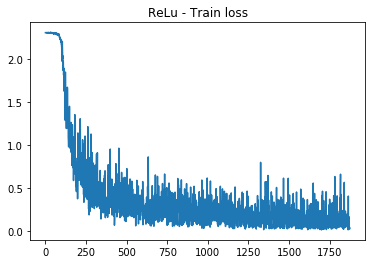

In [12]:
plt.plot(np.array(all_losses_ReLu))
plt.title('ReLu - Train loss')

In [13]:
all_losses_ReLu_test =[]
accuracies = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    all_losses_ReLu_test.append(loss)
    accuracies.append((np.argmax(output, 1)==y).mean())
test_accuracy_ReLu = np.mean(accuracies)

ReLu accuracy: 0.9569688498402555
ReLu mean loss: 0.12236682168110742


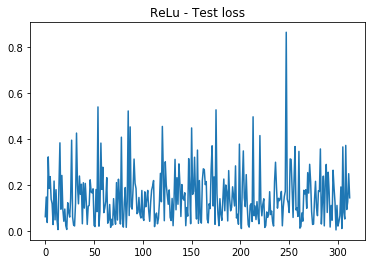

In [14]:
plt.plot(np.array(all_losses_ReLu_test))
plt.title('ReLu - Test loss')
print('ReLu accuracy:', test_accuracy_ReLu)
print('ReLu mean loss:', np.median(all_losses_ReLu_test))

In [15]:
class ELU:
    def __init__(self, a=1):
        self.a = a

    def forward(self, X):
        self.X = X
        return X * (X > 0) + self.a * (np.exp(X) - 1) * (X <= 0)
    
    def backward(self, dLdy):
        X = self.X
        dLdx = dLdy * ((X > 0) + self.a * np.exp(X) * (X <= 0))
        return dLdx

    def step(self, learning_rate):
        pass

In [16]:
layers = [Linear(784, 100), ELU(),
        Linear(100, 100), ELU(), Linear(100, 10)]
nn = NeuralNetwork(layers)

criterion = NLLLoss()
all_losses_ELU = []
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    all_losses_ELU.append(loss)
    nn.backward(dLdy)
    nn.step(0.1)

Text(0.5, 1.0, 'ELU - Train loss')

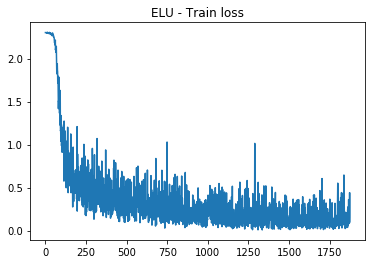

In [17]:
plt.plot(np.array(all_losses_ELU))
plt.title('ELU - Train loss')

In [18]:
all_losses_ELU_test =[]
accuracies = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    all_losses_ELU_test.append(loss)
    accuracies.append((np.argmax(output, 1)==y).mean())
test_accuracy_ELU = np.mean(accuracies)

ELU Accuracy: 0.9588658146964856
ELU mean loss: 0.11152794716696916


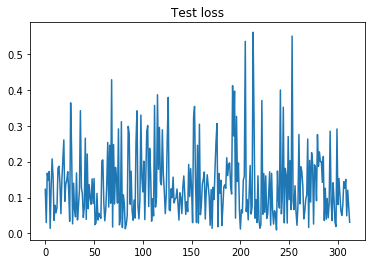

In [19]:
plt.plot(np.array(all_losses_ELU_test))
plt.title('Test loss')
print('ELU Accuracy:', test_accuracy_ELU)
print('ELU mean loss:', np.median(all_losses_ELU_test))

### Часть 3: Анализ ошибок
На каких объектах сеть ошибается больше всего?

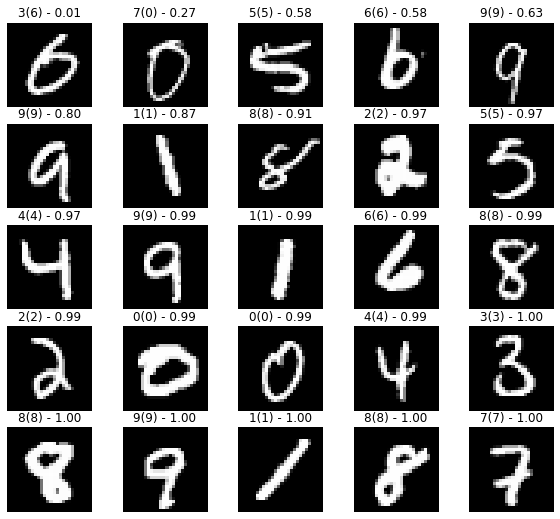

In [19]:
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    predictions = nn.forward(X)
    predictions = np.exp(predictions)
    predictions = predictions / np.sum(predictions, axis=1, keepdims=True)
    prob = predictions[range(X.shape[0]), y]
    ind = np.argsort(prob)[:25]
    plt.figure(figsize=(10, 9))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(X[ind[i], :].reshape(28, 28), cmap=plt.cm.Greys_r)
        plt.title('{}({}) - {:.2f}'.format(np.argmax(predictions[ind[i], :]), y[ind[i]], prob[ind[i]]))
        plt.axis('off')
    break

### HW1 (1 балл): Реализовать Tanh

In [20]:
class Tanh:
    def __init__(self):
        pass
    
    def forward(self, X):
        self.X = X
        return (np.exp(2*X) - 1) / (np.exp(2*X) + 1)
    
    def backward(self, dLdy):
        dLdx = dLdy * (4 / (np.exp(self.X) + np.exp(-self.X))**2)
        return dLdx
    
    def step(self, learning_rate):
        pass

In [21]:
layers = [Linear(784, 100), Tanh(),
        Linear(100, 100), Tanh(), Linear(100, 10)]
nn = NeuralNetwork(layers)

criterion = NLLLoss()
all_losses_Tanh =[]
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    all_losses_Tanh.append(loss)
    nn.backward(dLdy)
    nn.step(0.1)

Text(0.5, 1.0, 'Tanh - Train loss')

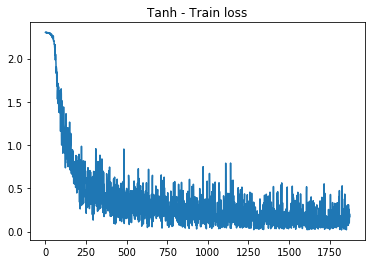

In [22]:
plt.plot(np.array(all_losses_Tanh))
plt.title('Tanh - Train loss')

In [23]:
all_losses_Tanh_test =[]
accuracies = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    all_losses_Tanh_test.append(loss)
    accuracies.append((np.argmax(output, 1)==y).mean())
test_accuracy_Tanh = np.mean(accuracies)

Tanh Accuracy: 0.9549720447284346
Tanh mean loss: 0.11496659665017367


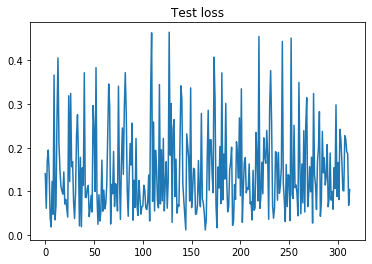

In [24]:
plt.plot(np.array(all_losses_Tanh_test))
plt.title('Test loss')
print('Tanh Accuracy:', test_accuracy_Tanh)
print('Tanh mean loss:', np.median(all_losses_Tanh_test))

### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

In [25]:
from skimage.transform import rotate, AffineTransform, warp

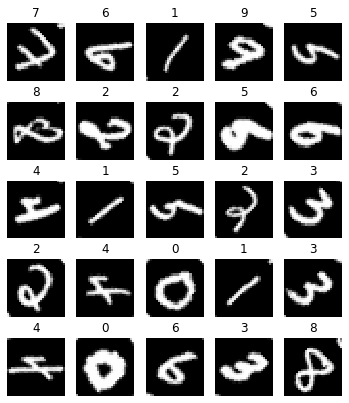

In [26]:
#rotating
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    plt.figure(figsize=(6, 7))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        rotated = rotate(X[i].reshape(28, 28), angle=-45, mode = 'wrap')
        plt.imshow(rotated, cmap=plt.cm.Greys_r)
        plt.title(y[i])
        plt.axis('off')
    break

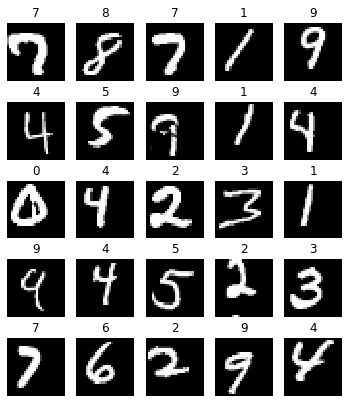

In [27]:
#shifting
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    plt.figure(figsize=(6, 7))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        transform = AffineTransform(translation=(np.random.randint(0, 5), np.random.randint(0, 5)))
        shifted = warp(X[i].reshape(28, 28), transform, mode= 'wrap')
        plt.imshow(shifted, cmap=plt.cm.Greys_r)
        plt.title(y[i])
        plt.axis('off')
    break

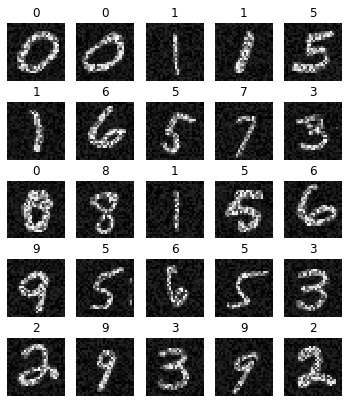

In [28]:
#noising
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    plt.figure(figsize=(6, 7))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        #X_noised = X[i] + np.random.random((28*28)) * 1
        X_noised = X[i] * np.random.random((28*28))
        plt.imshow(X_noised.reshape(28, 28), cmap=plt.cm.Greys_r)
        plt.title(y[i])
        plt.axis('off')
    break

In [29]:
layers = [Linear(784, 100), Tanh(),
        Linear(100, 100), Tanh(), Linear(100, 10)]
nn = NeuralNetwork(layers)

criterion = NLLLoss()
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    rotated = X
    y = y.numpy()
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    nn.backward(dLdy)
    nn.step(0.1)
    for i in range(25):
        rotated[i] = rotate(X[i].reshape(28, 28), angle=13, mode = 'wrap').reshape(X[i].shape[0])
    output = nn.forward(rotated)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    nn.backward(dLdy)
    nn.step(0.1)

In [30]:
all_losses_rotated_test =[]
accuracies = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    all_losses_rotated_test.append(loss)
    accuracies.append((np.argmax(output, 1)==y).mean())
test_accuracy_rotated = np.mean(accuracies)

Rotated Accuracy: 0.9601637380191693
Rotated loss: 0.10240719469389345


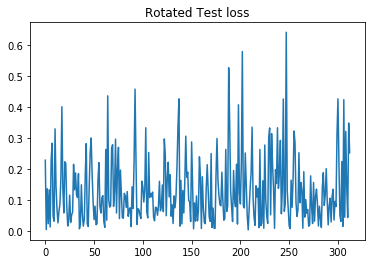

In [31]:
plt.plot(np.array(all_losses_rotated_test))
plt.title('Rotated Test loss')
print('Rotated Accuracy:', test_accuracy_rotated)
print('Rotated loss:', np.median(all_losses_rotated_test))

In [32]:
layers = [Linear(784, 100), Tanh(),
        Linear(100, 100), Tanh(), Linear(100, 10)]
nn = NeuralNetwork(layers)

criterion = NLLLoss()
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    shifted = X
    y = y.numpy()
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    nn.backward(dLdy)
    nn.step(0.1)
    for i in range(25):
        transform = AffineTransform(translation=(np.random.randint(0, 5), np.random.randint(0, 5)))
        shifted[i] = warp(X[i].reshape(28, 28), transform, mode= 'wrap').reshape(X[i].shape[0])
    output = nn.forward(shifted)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    nn.backward(dLdy)
    nn.step(0.1)

In [33]:
all_losses_shifted_test =[]
accuracies = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    all_losses_shifted_test.append(loss)
    accuracies.append((np.argmax(output, 1)==y).mean())
test_accuracy_shifted = np.mean(accuracies)

Shifted Accuracy: 0.9612619808306709
Shifted loss: 0.10457592919633274


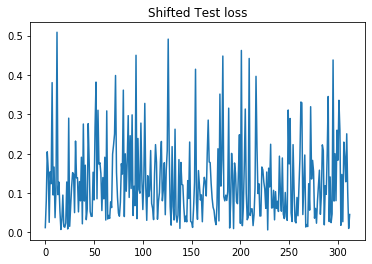

In [34]:
plt.plot(np.array(all_losses_shifted_test))
plt.title('Shifted Test loss')
print('Shifted Accuracy:', test_accuracy_shifted)
print('Shifted loss:', np.median(all_losses_shifted_test))

In [35]:
layers = [Linear(784, 100), Tanh(),
        Linear(100, 100), Tanh(), Linear(100, 10)]
nn = NeuralNetwork(layers)

criterion = NLLLoss()
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    noised = X
    y = y.numpy()
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    nn.backward(dLdy)
    nn.step(0.1)
    for i in range(25):
        noised[i] = X[i] * np.random.random((28*28))
    output = nn.forward(noised)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    nn.backward(dLdy)
    nn.step(0.1)

In [36]:
all_losses_noised_test =[]
accuracies = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    all_losses_noised_test.append(loss)
    accuracies.append((np.argmax(output, 1)==y).mean())
test_accuracy_noised = np.mean(accuracies)

Noised Accuracy: 0.9555710862619808
Noised loss: 0.10817538022232254


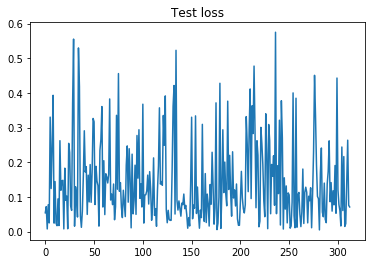

In [37]:
plt.plot(np.array(all_losses_noised_test))
plt.title('Test loss')
print('Noised Accuracy:', test_accuracy_noised)
print('Noised loss:', np.median(all_losses_noised_test))

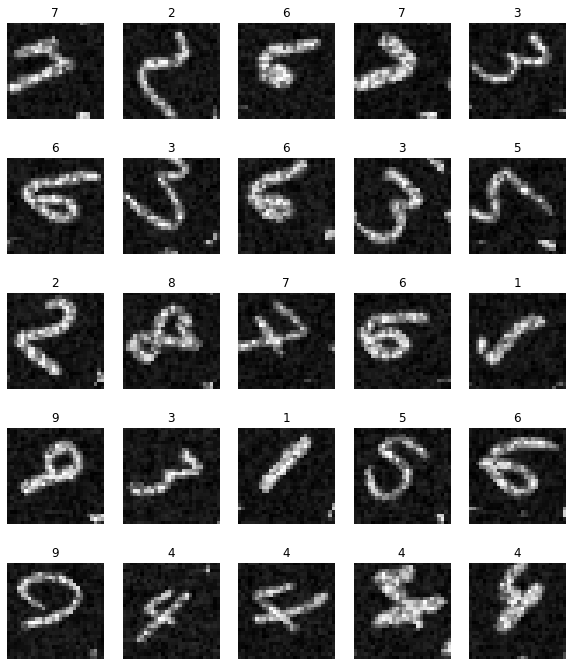

In [38]:
#rotating+shifting+noising
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    plt.figure(figsize=(10, 12))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        noised = X[i] * np.random.random((28*28))
        rotated = rotate(noised.reshape(28, 28), angle=-45, mode = 'wrap')
        transform = AffineTransform(translation=(np.random.randint(0, 5), np.random.randint(0, 5)))
        shifted = warp(rotated, transform, mode= 'wrap')
        plt.imshow(shifted, cmap=plt.cm.Greys_r)
        plt.title(y[i])
        plt.axis('off')
    break

In [39]:
layers = [Linear(784, 100), Tanh(),
        Linear(100, 100), Tanh(), Linear(100, 10)]
nn = NeuralNetwork(layers)

criterion = NLLLoss()
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    shifted = X
    y = y.numpy()
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    nn.backward(dLdy)
    nn.step(0.1)
    for i in range(25):
        noised = X[i] * np.random.random((28*28))
        rotated = rotate(noised.reshape(28, 28), angle=5, mode='wrap')
        transform = AffineTransform(translation=(np.random.randint(0, 3), np.random.randint(0, 3)))
        shifted[i] = warp(rotated, transform, mode='wrap').reshape(X[i].shape[0])
    output = nn.forward(shifted)
    loss = criterion.forward(output, y)
    dLdy = criterion.backward()
    nn.backward(dLdy)
    nn.step(0.1)

In [41]:
all_losses_mixed_test =[]
accuracies = []
for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy()
    y = y.numpy()
    
    output = nn.forward(X)
    loss = criterion.forward(output, y)
    all_losses_mixed_test.append(loss)
    accuracies.append((np.argmax(output, 1)==y).mean())
test_accuracy_mixed = np.mean(accuracies)

Noised + shifted + rotated Accuracy: 0.9609624600638977
Noised + shifted + rotated loss: 0.09490336222513848


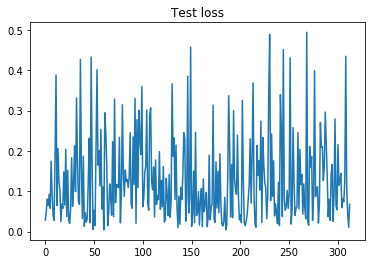

In [42]:
plt.plot(np.array(all_losses_mixed_test))
plt.title('Test loss')
print('Noised + shifted + rotated Accuracy:', test_accuracy_mixed)
print('Noised + shifted + rotated loss:', np.median(all_losses_mixed_test))

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?

Видим, что наилучшую сходимость дает Tanh, но лучшее качество - на ELU:

Sigmoid accuracy:  0.8064097444089456
ReLU accuracy:  0.9569688498402555
ELU accuracy:  0.9588658146964856
Tanh accuracy:  0.9549720447284346


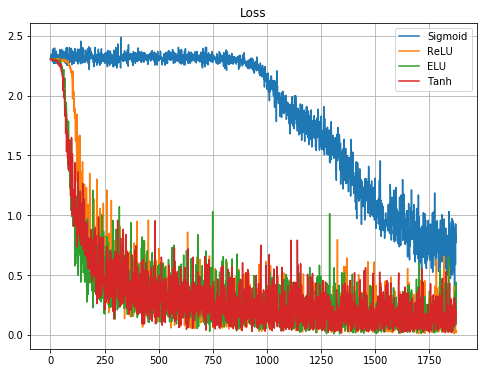

In [51]:
print('Sigmoid accuracy: ', test_accuracy_sigmoid)
print('ReLU accuracy: ', test_accuracy_ReLu)
print('ELU accuracy: ', test_accuracy_ELU)
print('Tanh accuracy: ', test_accuracy_Tanh)
plt.figure(figsize=(8, 6))
plt.title('Loss')
plt.plot(np.array(all_losses_sigmoid), label='Sigmoid')
plt.plot(np.array(all_losses_ReLu), label='ReLU')
plt.plot(np.array(all_losses_ELU), label='ELU')
plt.plot(np.array(all_losses_Tanh), label='Tanh')
plt.legend()
plt.grid()
plt.show()

Анализируя точность предсказаний, видим, что наилучшая точность достигается при случайном сдвиге изображений, а также при одновременном применении всех трех способов обработки изображений:

In [49]:
print('Rotated: ', test_accuracy_rotated)
print('Shifted: ', test_accuracy_shifted)
print('Noised: ', test_accuracy_noised)
print('Mixed: ', test_accuracy_mixed)

Rotated:  0.9601637380191693
Shifted:  0.9612619808306709
Noised:  0.9555710862619808
Mixed:  0.9609624600638977
